# pconv - Periodic convolution, kernel origin at array origin

##Synopse

1D, 2D or 3D Periodic convolution. (kernel origin at array origin)

- **g = pconv(f, h)**

  - **g**: Image. Output image. 

  - **f**: Image. Input image.
  - **h**: Image. PSF (point spread function), or kernel. The origin is at the array origin.

## Description

Perform a 1D, 2D or 3D discrete periodic convolution. The kernel origin is at the origin of image h. 
Both image and kernel are periodic with same period. Usually the kernel h is smaller than the image f, 
so h is padded with zero until the size of f. Supports complex images.

In [1]:
def pconv(f,h):
    import numpy as np

    h_ind=np.nonzero(h)
    f_ind=np.nonzero(f)
    if len(h_ind[0])>len(f_ind[0]):
        h,    f    = f,    h
        h_ind,f_ind= f_ind,h_ind

    gs = np.maximum(np.array(f.shape),np.array(h.shape))
    if (f.dtype == 'complex') or (h.dtype == 'complex'):
        g = np.zeros(gs,dtype='complex')
    else:
        g = np.zeros(gs)

    f1 = g.copy()
    f1[f_ind]=f[f_ind]      

    if f.ndim == 1:
        (W,) = gs
        col = np.arange(W)
        for cc in h_ind[0]:
            g[:] += f1[(col-cc)%W] * h[cc]

    elif f.ndim == 2:
        H,W = gs
        row,col = np.indices(gs)
        for rr,cc in np.transpose(h_ind):
            g[:] += f1[(row-rr)%H, (col-cc)%W] * h[rr,cc]

    else:
        Z,H,W = gs
        d,row,col = np.indices(gs)
        for dd,rr,cc in np.transpose(h_ind):
            g[:] += f1[(d-dd)%Z, (row-rr)%H, (col-cc)%W] * h[dd,rr,cc]
    return g

## Examples


In [3]:
testing = (__name__ == '__main__')
if testing:
    ! jupyter nbconvert --to python pconv.ipynb
    import numpy as np
    %matplotlib inline
    import matplotlib.image as mpimg
    import matplotlib.pyplot as plt
    import sys,os


[NbConvertApp] Converting notebook pconv.ipynb to python
[NbConvertApp] Writing 4789 bytes to pconv.py


## Numerical Example 1D

In [5]:
if testing: 
    f = np.array([0,0,0,1,0,0,0,0,1])
    print("f:",f)

    h = np.array([1,2,3])
    print("h:",h)

    g1 = pconv(f,h)
    g2 = pconv(h,f)
    print("g1:",g1)
    print("g2:",g2)

f: [0 0 0 1 0 0 0 0 1]
h: [1 2 3]
g1: [2. 3. 0. 1. 2. 3. 0. 0. 1.]
g2: [2. 3. 0. 1. 2. 3. 0. 0. 1.]


## Numerical Example 2D

In [8]:
if testing:
    f = np.array([[1,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0],
                  [0,0,0,1,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,1],
                  [0,0,0,0,0,0,0,0,0]])
    print("Image (f):")
    print(f)
    
    h = np.array([[1,2,3],
                  [4,5,6]])
    print("\n Image Kernel (h):")
    print(h)
    
    g1 = pconv(f,h)
    print("Image Output (g1=f*h):")
    print(g1)
    
    g2 = pconv(h,f)
    print("Image Output (g2=h*f):")
    print(g2)

Image (f):
[[1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0]]

 Image Kernel (h):
[[1 2 3]
 [4 5 6]]
Image Output (g1=f*h):
[[1. 2. 3. 0. 0. 0. 0. 0. 0.]
 [4. 5. 6. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 2. 3. 0. 0. 0.]
 [2. 3. 0. 4. 5. 6. 0. 0. 1.]
 [5. 6. 0. 0. 0. 0. 0. 0. 4.]]
Image Output (g2=h*f):
[[1. 2. 3. 0. 0. 0. 0. 0. 0.]
 [4. 5. 6. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 2. 3. 0. 0. 0.]
 [2. 3. 0. 4. 5. 6. 0. 0. 1.]
 [5. 6. 0. 0. 0. 0. 0. 0. 4.]]


## Numerical Example 3D

In [9]:
if testing:
    f = np.zeros((3,3,3))
    #f[0,1,1] = 1
    f[1,1,1] = 1
    #f[2,1,1] = 1
     
    print("\n Image Original (F): ")
    print(f)

    h = np.array([[[ 1,  2, 3 ],
                   [ 3,  4, 5 ], 
                   [ 5,  6, 7 ]],
                  [[ 8,  9, 10],
                   [11, 12, 13], 
                   [14, 15, 16]],
                  [[17, 18, 19],
                   [20, 21, 22], 
                   [23, 24, 25]]])
              
    print("\n Image Kernel (H): ")
    print(h)
    
    result = pconv(f,h)
    print("\n Image Output - (G): ")
    print(result)


 Image Original (F): 
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 1. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]

 Image Kernel (H): 
[[[ 1  2  3]
  [ 3  4  5]
  [ 5  6  7]]

 [[ 8  9 10]
  [11 12 13]
  [14 15 16]]

 [[17 18 19]
  [20 21 22]
  [23 24 25]]]

 Image Output - (G): 
[[[25. 23. 24.]
  [19. 17. 18.]
  [22. 20. 21.]]

 [[ 7.  5.  6.]
  [ 3.  1.  2.]
  [ 5.  3.  4.]]

 [[16. 14. 15.]
  [10.  8.  9.]
  [13. 11. 12.]]]


## Example with Image 2D


Prewitt´s Mask
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


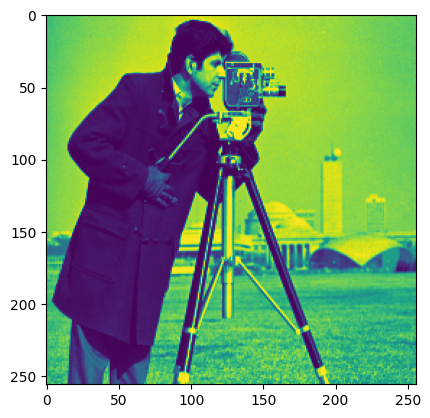

In [11]:
if testing:
    f = mpimg.imread('../figures/cameraman.tif')
    plt.imshow(f)
    h = np.array([[-1,-1,-1],
                  [ 0, 0, 0],
                  [ 1, 1, 1]])
    g = pconv(f,h)
    print("\nPrewitt´s Mask")
    print(h)
    


In [13]:
def normalize(f, range=[0,255]):

    f = np.asarray(f)
    range = np.asarray(range)
    if f.dtype.char in ['D', 'F']:
        raise Exception('error: cannot normalize complex data')
    faux = np.ravel(f).astype(float)
    minimum = faux.min()
    maximum = faux.max()
    lower = range[0]
    upper = range[1]
    if upper == lower:
        g = np.ones(f.shape) * maximum
    if minimum == maximum:
        g = np.ones(f.shape) * (upper + lower) / 2.
    else:
        g = (faux-minimum)*(upper-lower) / (maximum-minimum) + lower
    g = g.reshape(f.shape)

    if f.dtype == np.uint8:
        if upper > 255: 
            raise Exception('normalize: warning, upper valuer larger than 255. Cannot fit in uint8 image')
    if lower == 0 and upper == 255:
        g = g.astype(np.uint8)
    else:
        g = g.astype(f.dtype) # set data type of result the same as the input image
    return g

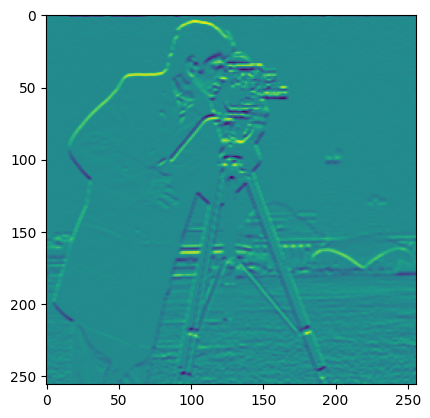

In [14]:
if testing:

    gn = normalize(g, [0,255])
    plt.imshow(gn)


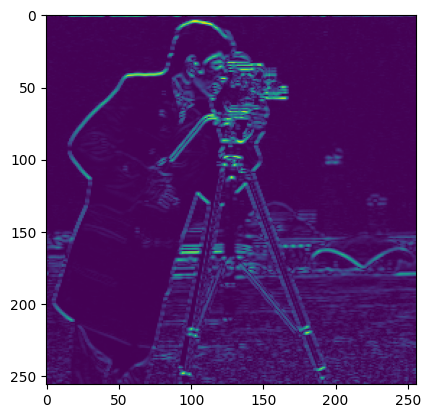

In [15]:
if testing:

    plt.imshow(normalize(abs(g)))

## Equation

$$ f(i) = f(i + kN), h(i)=h(i+kN)$$

$$    mod(i,N) = i - N \lfloor \frac{i}{N} \rfloor $$

$$    (f \ast_W h) (col) = \sum_{cc=0}^{W-1} f(mod(col-cc,W)) h(cc)$$

$$    (f \ast_{(H,W)} h) (row,col) = \sum_{rr=0}^{H-1} \sum_{cc=0}^{W-1} f(mod(row-rr,H), mod(col-cc,W)) h(rr,cc)$$

$$    (f \ast_{(Z,H,W)} h) (d,row,col) =  \sum_{dd=0}^{Z-1} \sum_{rr=0}^{H-1} \sum_{cc=0}^{W-1} f(mod(d-dd,Z), mod(row-rr,N), mod(col-cc,W)) h(dd,rr,cc)$$ 
    

## See also

- [conv](conv.ipynb)  - 2D or 3D linear discrete convolution.
- [ptrans](ptrans.ipynb)  - Periodic translation.
- [convteo](../master/convteo.ipynb)  - Illustrate the convolution theorem.

## Contributions:

- Francislei J. Silva (set 2013)
- Roberto M. Souza (set 2013)